Загрузка tensorflow и датасета

In [1]:
%pip install tensorflow
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Note: you may need to restart the kernel to use updated packages.


2022-10-29 15:34:51.512229: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-29 15:34:51.783232: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-29 15:34:51.783257: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-29 15:34:51.823480: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-29 15:34:53.517791: W tensorflow/stream_executor/platform/de

2.10.0


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
test_images.shape

(10000, 28, 28)

Отрисовка датасета

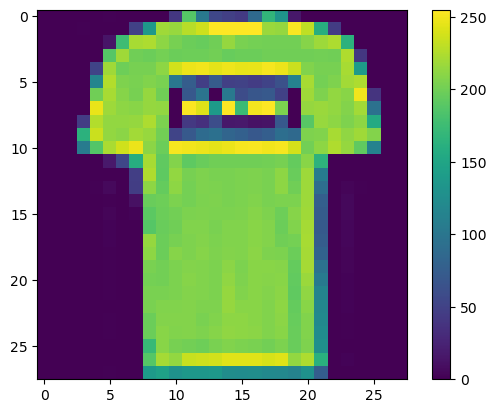

In [8]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

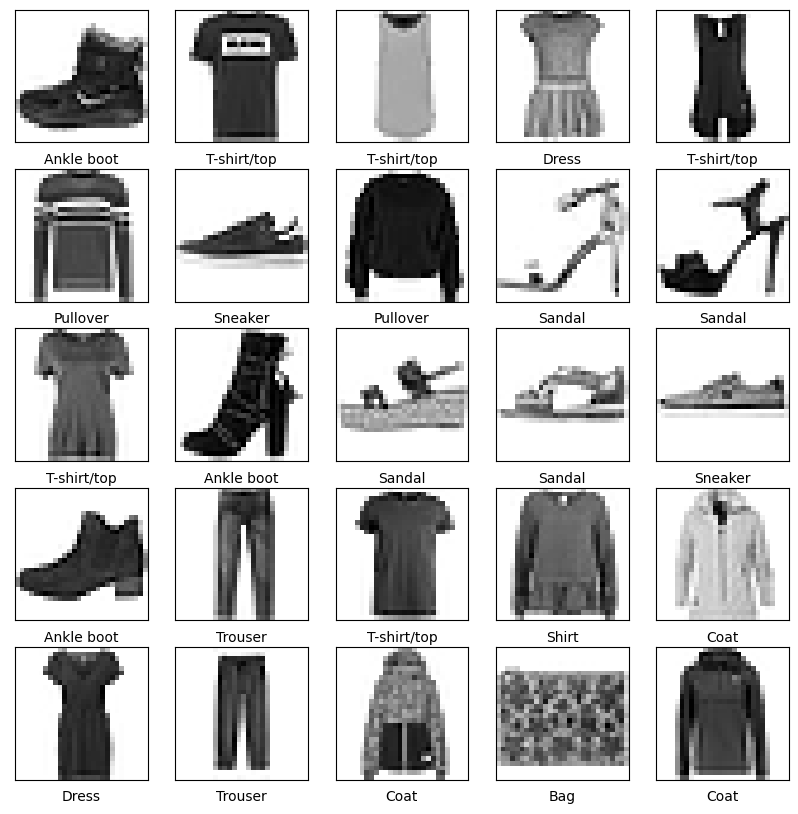

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Сборка моделей

In [11]:
28*28

784

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

2022-10-29 15:34:58.200380: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-29 15:34:58.200418: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-29 15:34:58.200447: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (greenmachine-Inspiron-5570): /proc/driver/nvidia/version does not exist
2022-10-29 15:34:58.200776: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


Обучение модели и получение точности прелсказания на тестовом множестве

In [14]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.3)

Epoch 1/10


2022-10-29 15:34:58.519205: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 131712000 exceeds 10% of free system memory.


1313/1313 [==============================] - 6s 4ms/step - loss: 0.5493 - accuracy: 0.8062 - val_loss: 0.4160 - val_accuracy: 0.8541
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3918 - accuracy: 0.8561 - val_loss: 0.3954 - val_accuracy: 0.8578
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3524 - accuracy: 0.8703 - val_loss: 0.3737 - val_accuracy: 0.8653
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3259 - accuracy: 0.8776 - val_loss: 0.3396 - val_accuracy: 0.8789
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3062 - accuracy: 0.8870 - val_loss: 0.3506 - val_accuracy: 0.8730
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2893 - accuracy: 0.8928 - val_loss: 0.3502 - val_accuracy: 0.8765
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2775 - accuracy: 0.8959 - val_loss: 0.3468 - val_accuracy: 0.8762
Epo

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)

print('Точность на тестовом множестве:', test_acc)

Точность на тестовом множестве: 0.8788999915122986


In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8789


In [17]:
y_pred = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


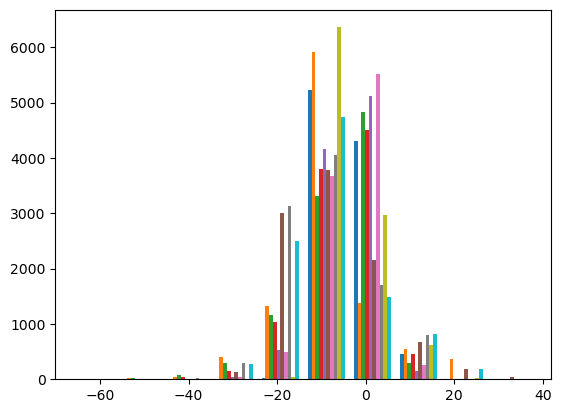

In [18]:
plt.hist(y_pred);

In [19]:
y_pred.shape

(10000, 10)

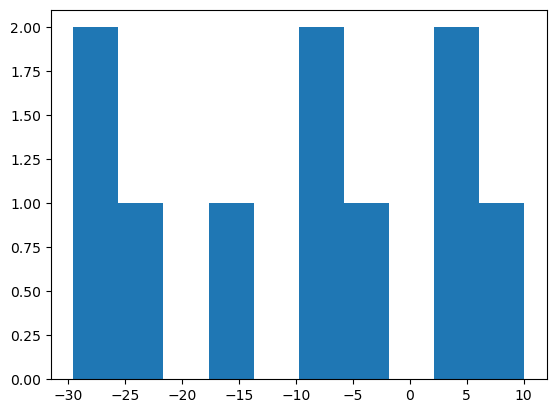

In [20]:
plt.hist(y_pred[1]);

In [21]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [22]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [23]:
predictions[0]

array([6.4552694e-07, 6.2325995e-08, 2.3749442e-09, 6.7316814e-09,
       1.3038521e-08, 1.2169501e-04, 4.0146023e-07, 3.2357624e-04,
       1.5083732e-07, 9.9955350e-01], dtype=float32)

In [24]:
np.round(predictions[0], 2)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [26]:
test_labels[0]

9

In [27]:
class_names[9]

'Ankle boot'

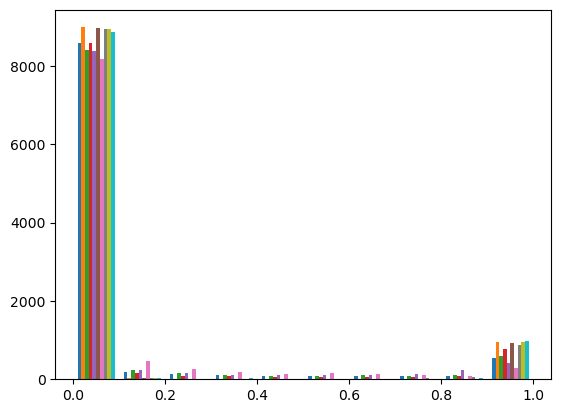

In [28]:
plt.hist(predictions);

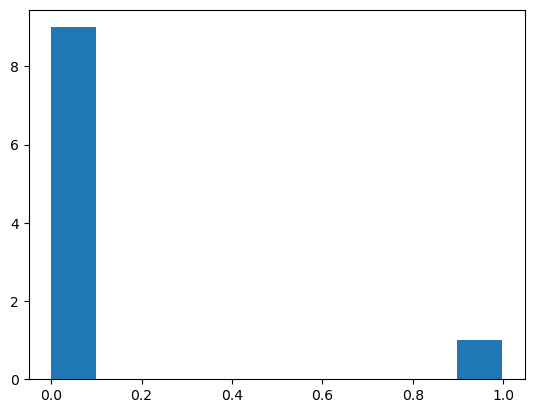

In [29]:
plt.hist(predictions[9]);

Получение точности вручную

In [30]:
predictions.shape

(10000, 10)

In [31]:
predictions.argmax(axis=1)

array([9, 2, 1, ..., 8, 1, 5])

In [32]:
predictions.argmax(axis=1) == test_labels

array([ True,  True,  True, ...,  True,  True,  True])

In [33]:
np.sum(predictions.argmax(axis=1) == test_labels)

8789

In [34]:
np.sum(predictions.argmax(axis=1) == test_labels) / test_labels.shape[0]

0.8789

In [35]:
np.mean(predictions.argmax(axis=1) == test_labels)

0.8789

Отрисовка результатов

In [36]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

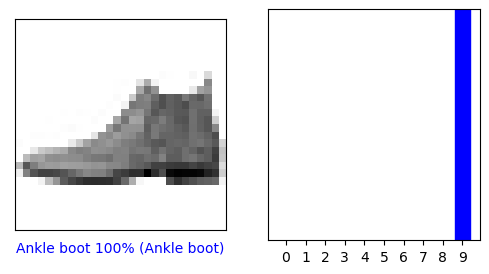

In [37]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

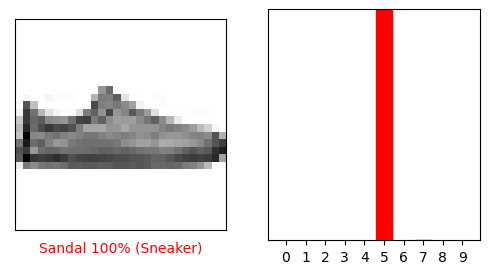

In [38]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

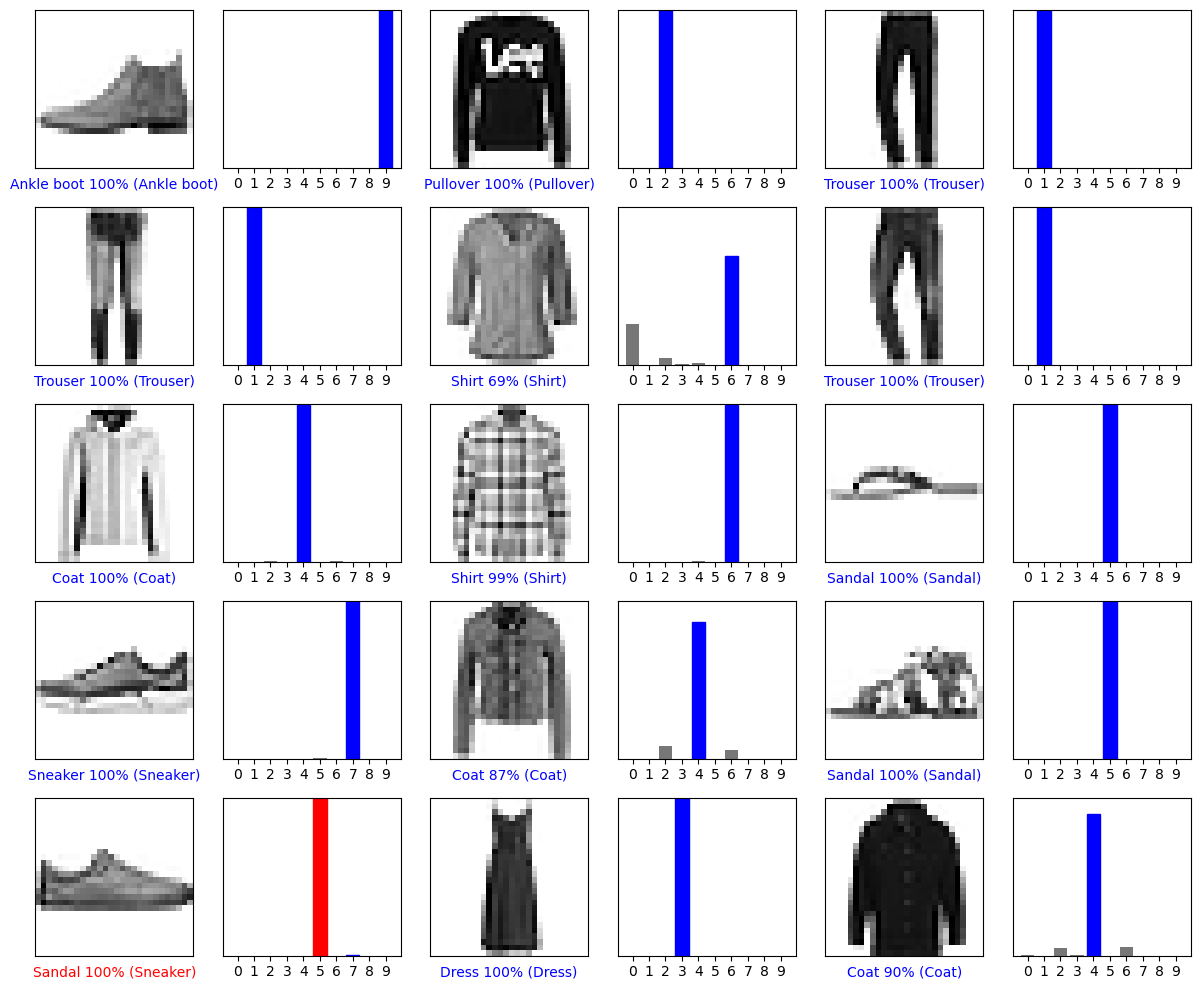

In [39]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [40]:
img = test_images[3000].copy()

print(img.shape)

(28, 28)


In [41]:
probability_model.predict(img)

1/1 [==============================] - 0s 51ms/step


array([[2.8340555e-10, 1.0000000e+00, 8.7770104e-12, 1.5211306e-09,
        3.1684464e-09, 9.0699915e-15, 2.0895390e-09, 1.8808016e-16,
        1.6242173e-10, 3.9949757e-13]], dtype=float32)

In [42]:
img = (np.expand_dims(img, 0)) # Преобразование к требуемому виду входного сигнала нейросети

print(img.shape)

(1, 28, 28)


In [43]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 17ms/step
[[2.8340555e-10 1.0000000e+00 8.7770104e-12 1.5211306e-09 3.1684464e-09
  9.0699915e-15 2.0895390e-09 1.8808016e-16 1.6242173e-10 3.9949757e-13]]


In [44]:
np.round(predictions_single, 2)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

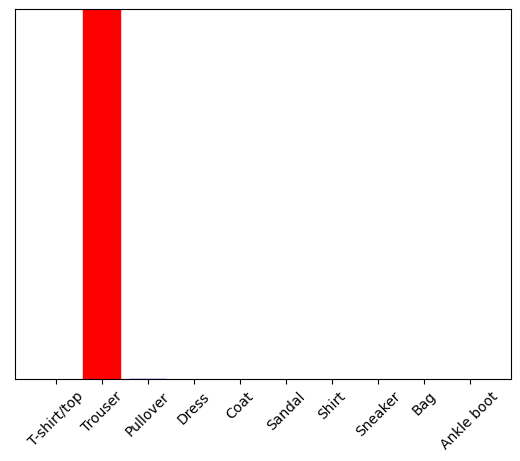

In [45]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [46]:
np.argmax(predictions_single[0])

1

Дополнительные примеры

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
model.fit(train_images, train_labels, epochs=5, validation_split=0.3)

Epoch 1/5


2022-10-29 15:35:43.118844: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 131712000 exceeds 10% of free system memory.


1313/1313 [==============================] - 4s 2ms/step - loss: 0.5321 - accuracy: 0.8093 - val_loss: 0.4062 - val_accuracy: 0.8522
Epoch 2/5
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3886 - accuracy: 0.8575 - val_loss: 0.3963 - val_accuracy: 0.8506
Epoch 3/5
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3502 - accuracy: 0.8706 - val_loss: 0.3619 - val_accuracy: 0.8654
Epoch 4/5
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3228 - accuracy: 0.8806 - val_loss: 0.3751 - val_accuracy: 0.8588
Epoch 5/5
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3042 - accuracy: 0.8866 - val_loss: 0.3439 - val_accuracy: 0.8787


In [49]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3633 - accuracy: 0.8679
